 # 18.s096 Final Project - Dimitris Koutentakis
 # Code and Diagram  Appendix

In [211]:
library(quantmod)


In [279]:
myPCA <- function(x_mat){
    x_mat = x_mat
    T = length(x_mat[1,])
    delta_x = (x_mat[,2:T]-x_mat[,1:(T-1)])/x_mat[,1:(T-1)]

    x_means = rowMeans(delta_x)
    x_cent = delta_x-x_means
    S = x_cent %*% t(x_cent)/(T-2)
    Sp = t(x_cent) %*% x_cent/(T-2)


    u_vecs = eigen(S)$vectors
    u_vecs = t(t(u_vecs)*sign(u_vecs[1,]))
    lambdas = eigen(S)$values
    v_vecs = eigen(Sp)$vectors
    total_var = sum(lambdas)

    proportions = lambdas/total_var
    
    return(list("u_vecs"=u_vecs,"lambdas"=lambdas,"v_vecs"=v_vecs,
                "total_var" = total_var,"T"=T,"delta_x" = delta_x, 
                "x_cent"=x_cent,"proportions"=proportions))
}

In [406]:
stockData <- new.env()
startDate = as.Date("2015-01-01")
endDate = as.Date("2018-05-01")
tickers <- c("AAPL", "GOOGL", "MSFT", "FB", "INTC", "CSCO", "NVDA", "IBM", "QCOM")




In [ ]:
getSymbols(tickers, env = stockData, src = "yahoo", from = startDate, to = endDate)

In [402]:
x_mat = matrix(c(Cl(stockData$AAPL), Cl(stockData$GOOGL), Cl(stockData$MSFT), 
              Cl(stockData$FB), Cl(stockData$INTC), Cl(stockData$CSCO),
             Cl(stockData$NVDA), Cl(stockData$IBM), Cl(stockData$QCOM)), 
               nrow = 9, byrow=FALSE)
# x_mat
pca_an = myPCA(x_mat)


In [403]:
u_vecs = pca_an$u_vecs
lambdas = pca_an$lambdas
v_vecs = pca_an$v_vecs
total_var = pca_an$total_var
T = pca_an$T
xmat = pca_an$x_mat
delta_x = pca_an$delta_x
x_cent = pca_an$x_cent
proportions = pca_an$proportions
# u_vecs
# sign(u_vecs[1,])
# sweep(u_vecs, 2, sign(u_vecs[1,]), '*')


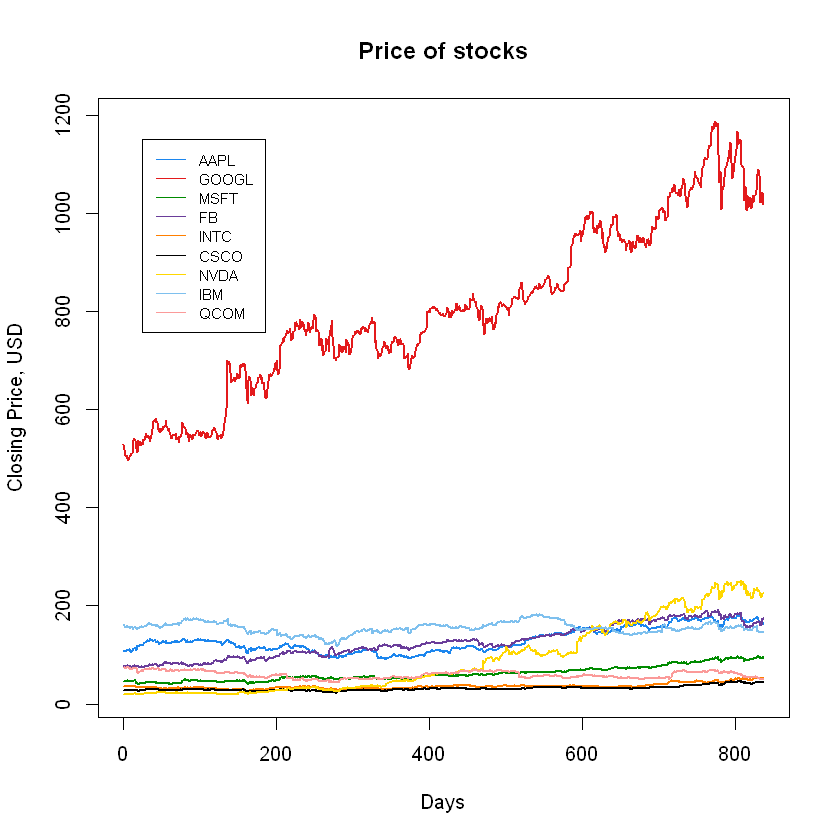

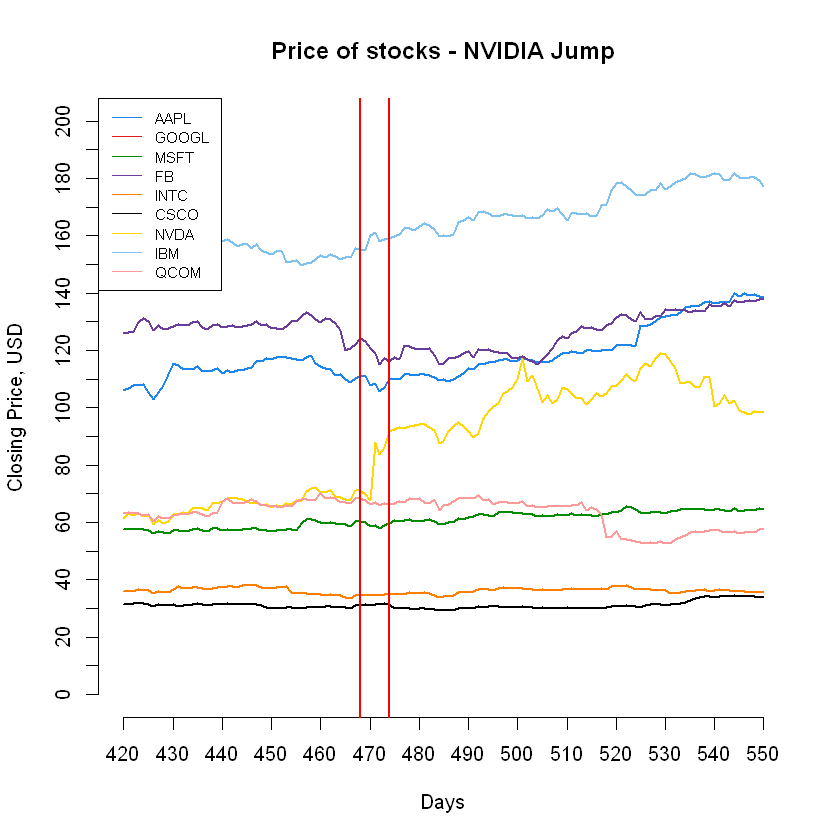

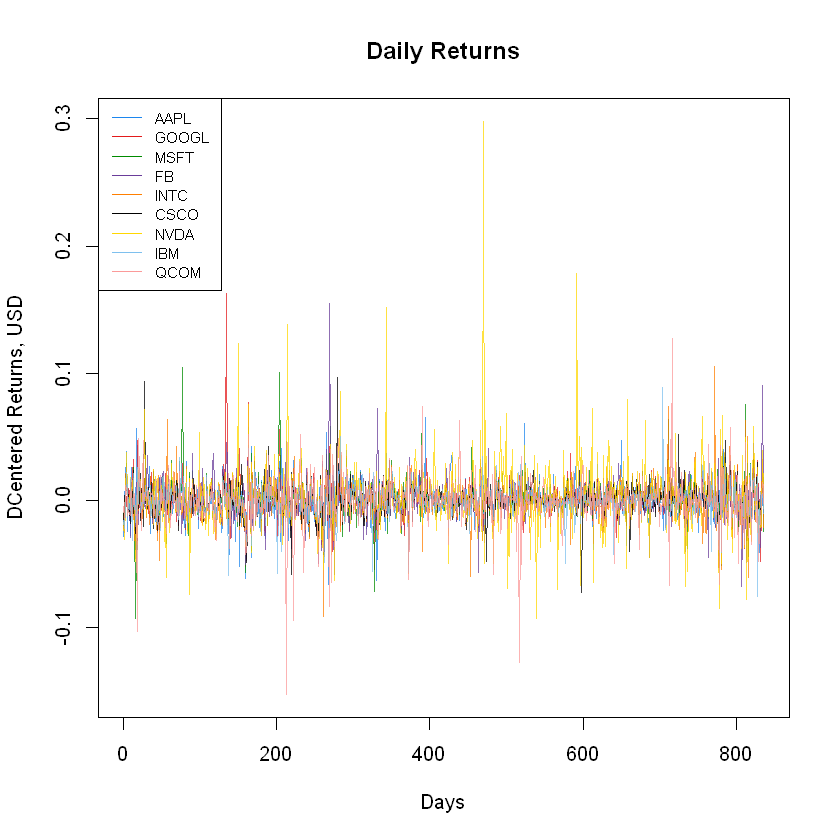

In [435]:

colorvec <- c("dodgerblue2","#E31A1C", # red
                "green4",
                "#6A3D9A", # purple
                "#FF7F00", # orange
                "black","gold1",
                "skyblue2","#FB9A99", # lt pink
                "palegreen2",
                "gray70", "khaki2",
                "maroon","orchid1","deeppink1","blue1","steelblue4",
                "darkturquoise","green1","yellow4","yellow3",
                "darkorange4")

matplot(t(x_mat), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "Closing Price, USD", main="Price of stocks") #[,c(TRUE, rep(FALSE,2))]
legend(25,1150,legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(x_mat[,420:550]), lty=1, type='l' , col=colorvec, ylim = c(0,200),
        lwd=2, xlab = "Days", ylab = "Closing Price, USD", 
        main="Price of stocks - NVIDIA Jump", axes=F) #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)
v2 = seq(420, 550,10)
v1 = v2-419
axis(side=1,at=v1,labels=v2 )

v2 = seq(0, 200,10)
v1 = v2
axis(side=2,at=v1,labels=v2 )

abline(v=49, col = "red", lwd = 2)
abline(v=55, col = "red", lwd = 2)


matplot(t(delta_x), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.75),
        lwd=1, xlab = "Days", ylab = "DCentered Returns, USD", main="Daily Returns") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)


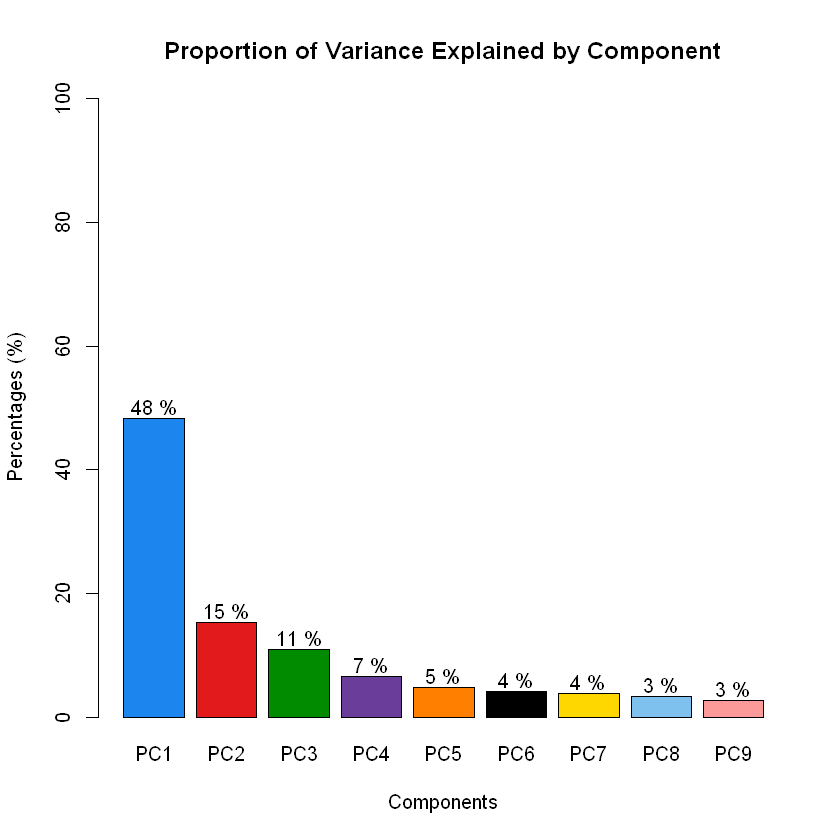

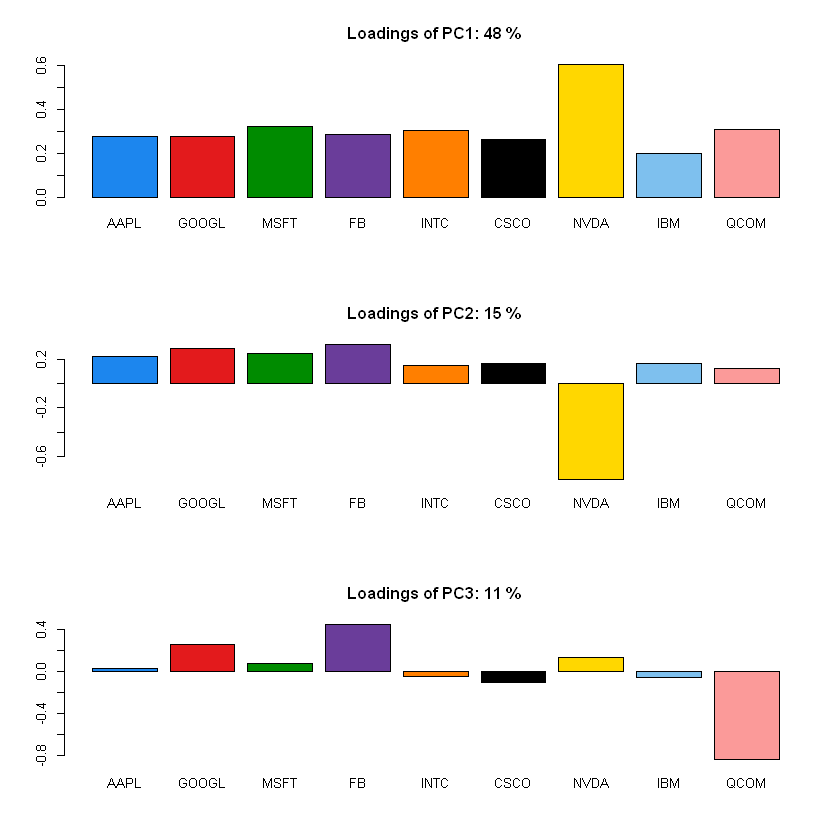

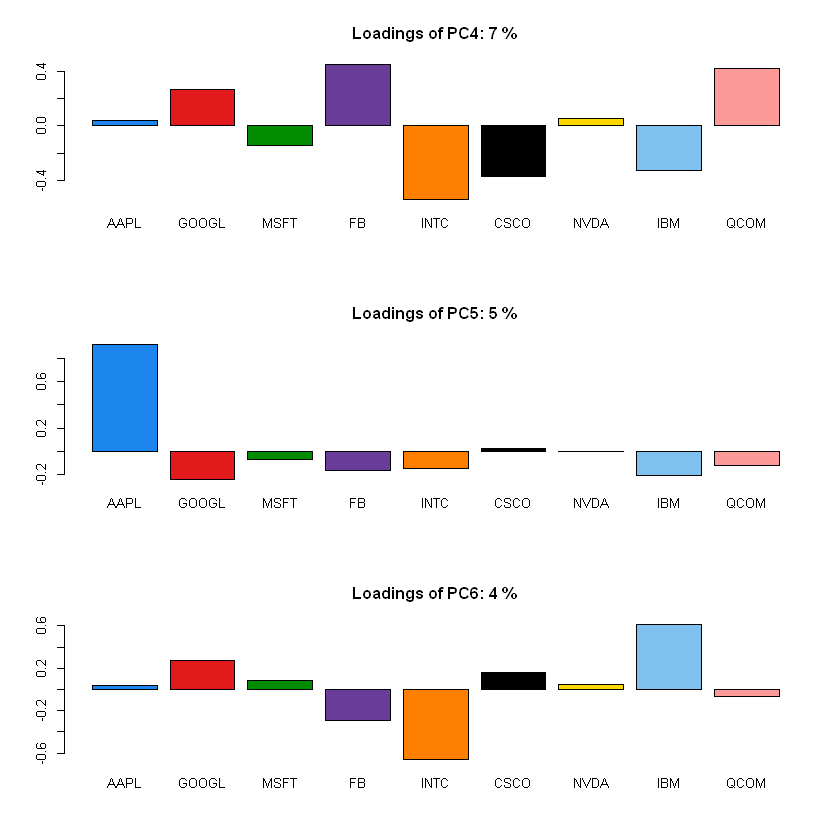

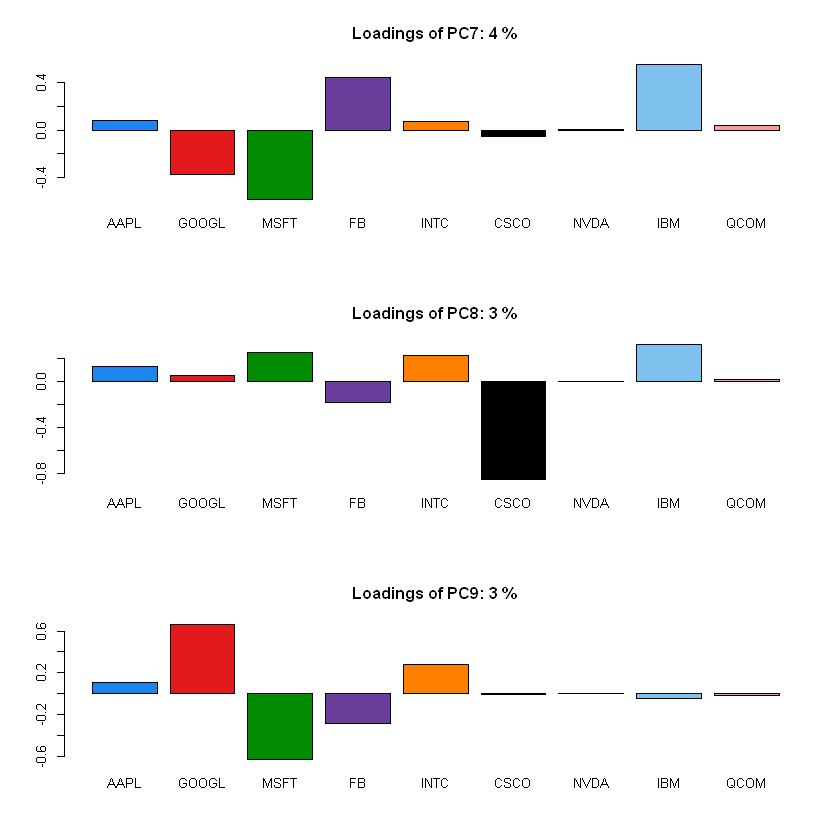

In [247]:

b<-barplot(proportions[1:9]*100, col = colorvec, 
        main = "Proportion of Variance Explained by Component",
       xlab="Components", ylab="Percentages (%)", 
        names = c("PC1", "PC2", "PC3","PC4", "PC5", "PC6", "PC7", "PC8","PC9"),
                 ylim=c(0,100))
text(x=b, y=proportions[1:9]*100+2, sprintf("%s %%",round(proportions[1:9]*100)))

components = 9
  par(mfrow = c(3,1))
for (component in c(1:components)){
    barplot(u_vecs[,component], col = colorvec, names = tickers, 
            main = sprintf("Loadings of PC%s: %s %%",component, 
                           round(proportions[component]*100)) )
}


In [252]:
PC1 = u_vecs[,1]%*%x_cent
PC2 = u_vecs[,2]%*%x_cent
PC3 = u_vecs[,3]%*%x_cent
PCtot = t(u_vecs) %*% x_cent #vs x_mat?
PCtot2 = t(u_vecs) %*% delta_x


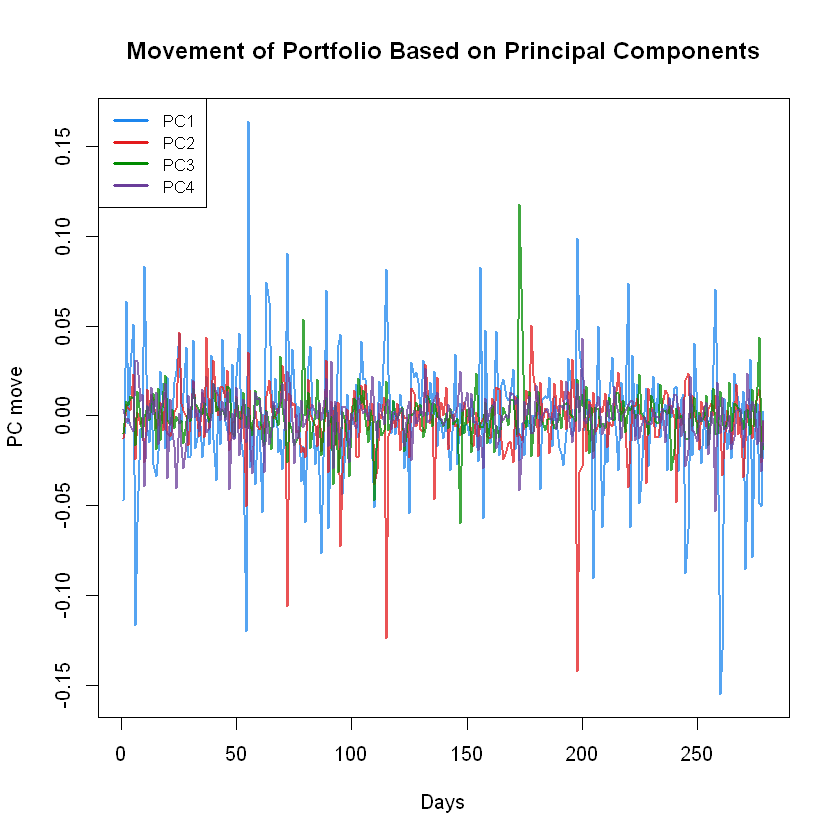

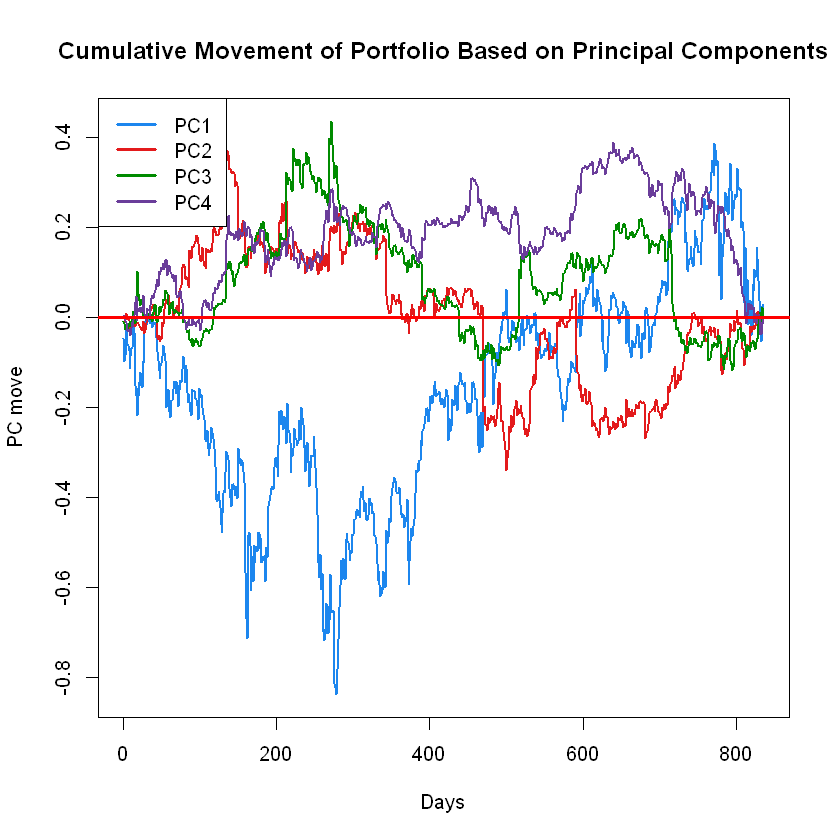

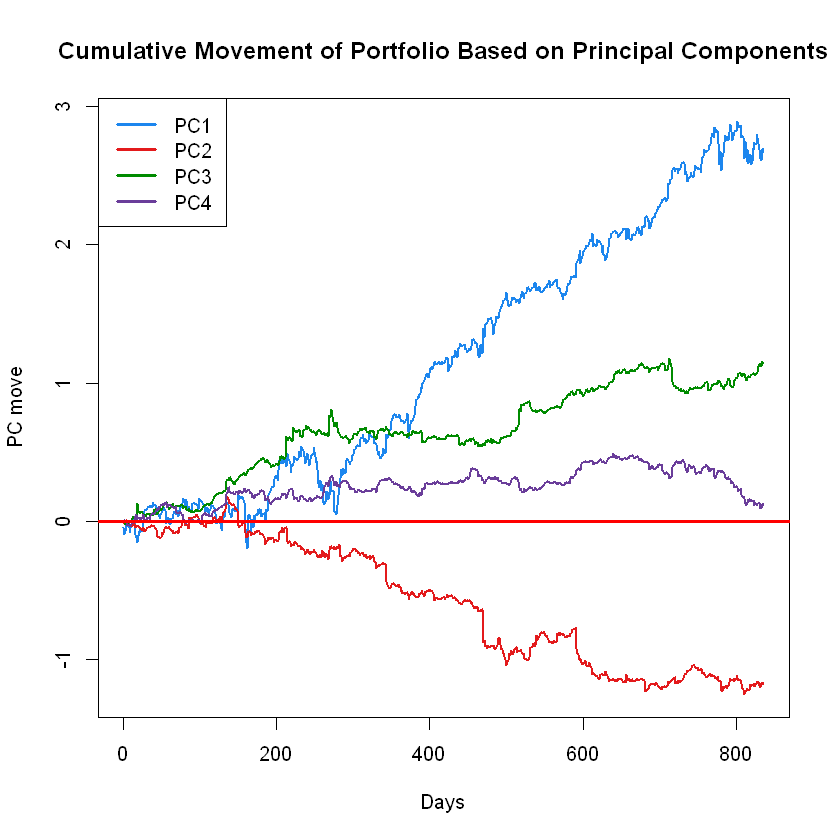

In [253]:
# par(mfrow = c(1,1))
# plot(c(1:(T-1)), PC1)
# lines(c(1:(T-1)), PC1)

# plot(c(1:(T-1)), PC2)
# lines(c(1:(T-1)), PC2)

matplot(t(PCtot[1:4,c(TRUE, rep(FALSE,2))]), lty=1, type='l' , 
        col=adjustcolor(colorvec, alpha.f=0.75),
        lwd=1.6, xlab = "Days", ylab = "PC move", 
        main="Movement of Portfolio Based on Principal Components") 
legend("topleft",legend=c("PC1","PC2","PC3","PC4"), 
       cex = 0.85, lty=1,lwd = 3, col = colorvec)

cum_PCs = t(apply(PCtot,1,cumsum)[,1:4])
# cum_PCs_additive = apply(cum_PCs*proportions[1:4],2,cumsum)

matplot(t(cum_PCs), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "PC move", 
        main="Cumulative Movement of Portfolio Based on Principal Components") 
legend("topleft",legend=c("PC1","PC2","PC3","PC4"), 
       cex = 1, lty=1,lwd = 3, col = colorvec)

abline(0,0, col="red", lwd=3)


cum_PCs_2 = t(apply(PCtot2,1,cumsum)[,1:4])

matplot(t(cum_PCs_2), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "PC move", 
        main="Cumulative Movement of Portfolio Based on Principal Components") 
legend("topleft",legend=c("PC1","PC2","PC3","PC4"), 
       cex = 1, lty=1,lwd = 3, col = colorvec)

abline(0,0, col="red", lwd=3)





# matplot(t(cum_PCs_additive), lty=1, type='l' , col=colorvec,
#         lwd=2, xlab = "Days", ylab = "PC move", main="Cumulative Movement of Portfolio Based on Principal Components") 
# legend("topleft",legend=c("PC1","PC2","PC3","PC4"), cex = 1, lty=1,lwd = 3, col = colorvec)



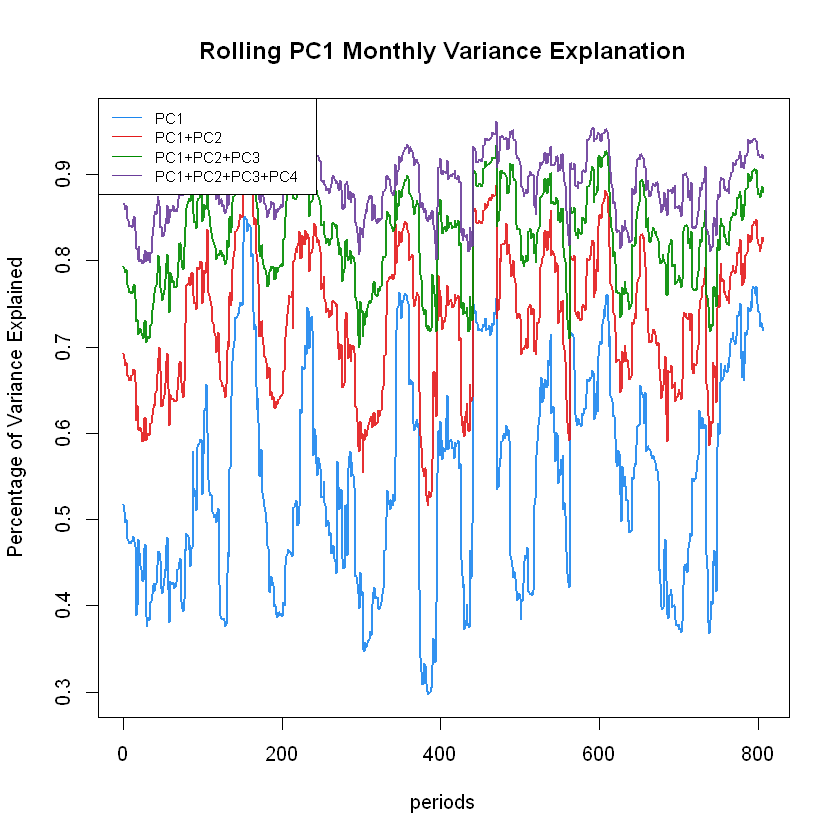

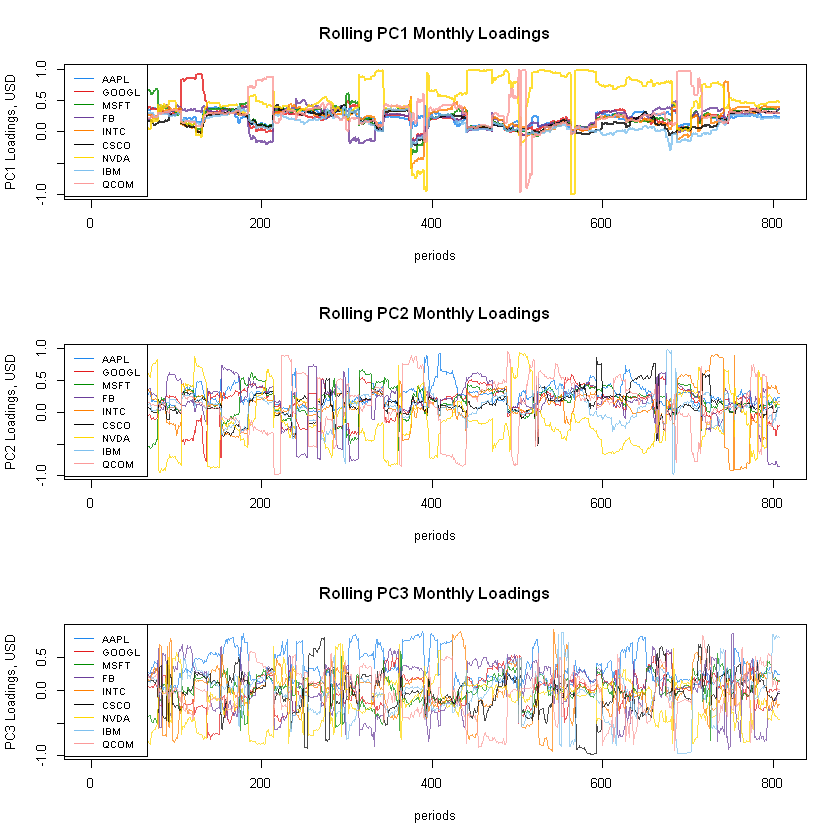

In [223]:
# Rolling PCA
u1_vecs = u2_vecs = u3_vecs = u4_vecs =proportion_mat = matrix(nrow = 9, ncol = (T-30))

for (period in c(1:(T-30))){
#      print(period)
    x_minimat = x_mat[,period:(period+30)]
    PCA_mini = myPCA(x_minimat)
    u1_vecs[,period] = PCA_mini$u_vecs[,1]
    u2_vecs[,period] = PCA_mini$u_vecs[,2]
    u3_vecs[,period] = PCA_mini$u_vecs[,3]
    u4_vecs[,period] = PCA_mini$u_vecs[,4]
    proportion_mat[,period] = PCA_mini$proportions
}

matplot(t(apply(proportion_mat[1:4,], 2, cumsum)), lty=1, type='l' , 
        col=adjustcolor(colorvec, alpha.f = 0.9),
        lwd=2, xlab = "periods", ylab = "Percentage of Variance Explained", 
        main="Rolling PC1 Monthly Variance Explanation") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=c("PC1", "PC1+PC2", "PC1+PC2+PC3", "PC1+PC2+PC3+PC4"), 
       cex = 0.75, lty=1, col = colorvec)

par(mfrow = c(3,1))
matplot(t(u1_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=2, xlab = "periods", ylab = "PC1 Loadings, USD", 
        main="Rolling PC1 Monthly Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(u2_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=1, xlab = "periods", ylab = "PC2 Loadings, USD", 
        main="Rolling PC2 Monthly Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(u3_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.7),
        lwd=1, xlab = "periods", ylab = "PC3 Loadings, USD", 
        main="Rolling PC3 Monthly Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)


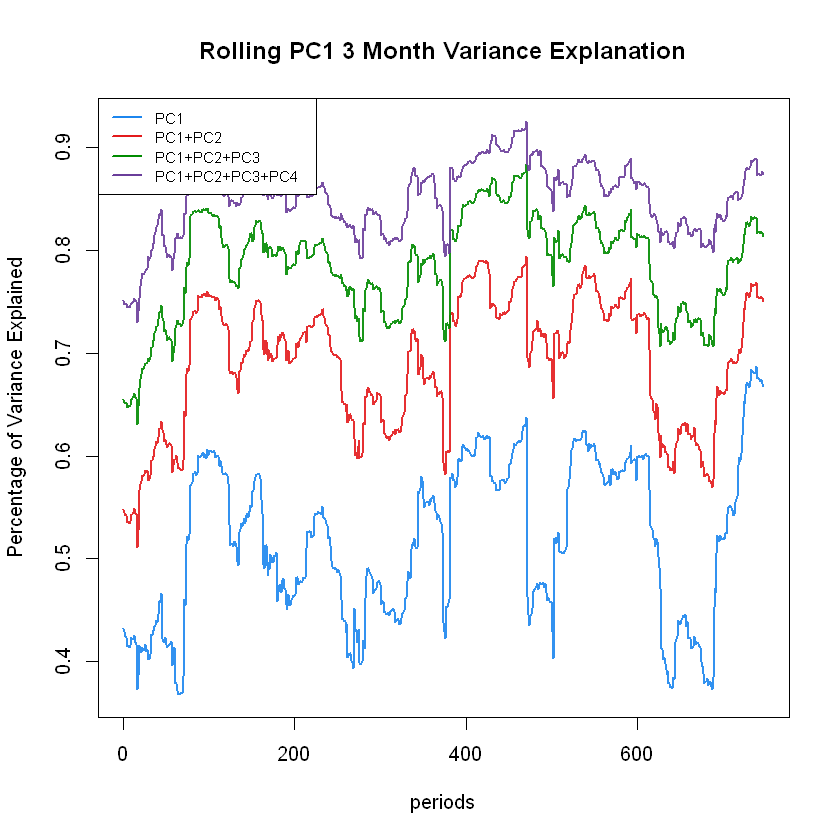

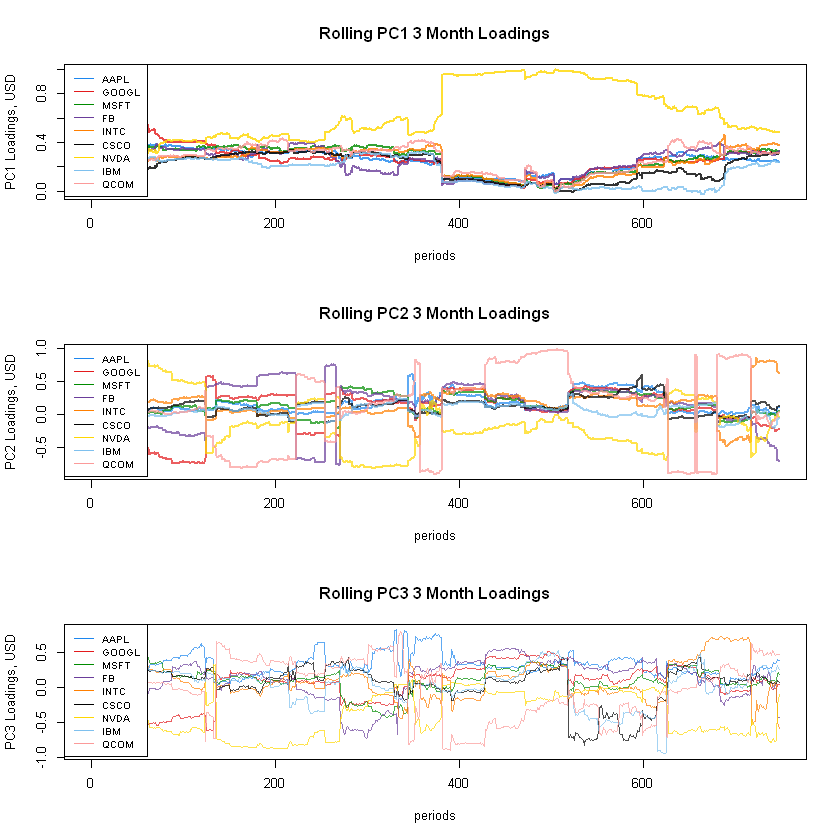

In [224]:

# Rolling PCA
u1_vecs = u2_vecs = u3_vecs = u4_vecs =proportion_mat = matrix(nrow = 9, ncol = (T-90))

for (period in c(1:(T-90))){
#      print(period)
    x_minimat = x_mat[,period:(period+90)]
    PCA_mini = myPCA(x_minimat)
    u1_vecs[,period] = PCA_mini$u_vecs[,1]
    u2_vecs[,period] = PCA_mini$u_vecs[,2]
    u3_vecs[,period] = PCA_mini$u_vecs[,3]
    u4_vecs[,period] = PCA_mini$u_vecs[,4]
    proportion_mat[,period] = PCA_mini$proportions
}

matplot(t(apply(proportion_mat[1:4,], 2, cumsum)), lty=1, type='l' , 
        col=adjustcolor(colorvec, alpha.f = 0.9),
        lwd=2, xlab = "periods", ylab = "Percentage of Variance Explained", 
        main="Rolling PC1 3 Month Variance Explanation") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=c("PC1", "PC1+PC2", "PC1+PC2+PC3", "PC1+PC2+PC3+PC4"), 
       cex = 0.75, lty=1,lwd=2, col = colorvec)

par(mfrow = c(3,1))
matplot(t(u1_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=2, xlab = "periods", ylab = "PC1 Loadings, USD", 
        main="Rolling PC1 3 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(u2_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.7),
        lwd=2, xlab = "periods", ylab = "PC2 Loadings, USD", 
        main="Rolling PC2 3 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(u3_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.7),
        lwd=1, xlab = "periods", ylab = "PC3 Loadings, USD", 
        main="Rolling PC3 3 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)


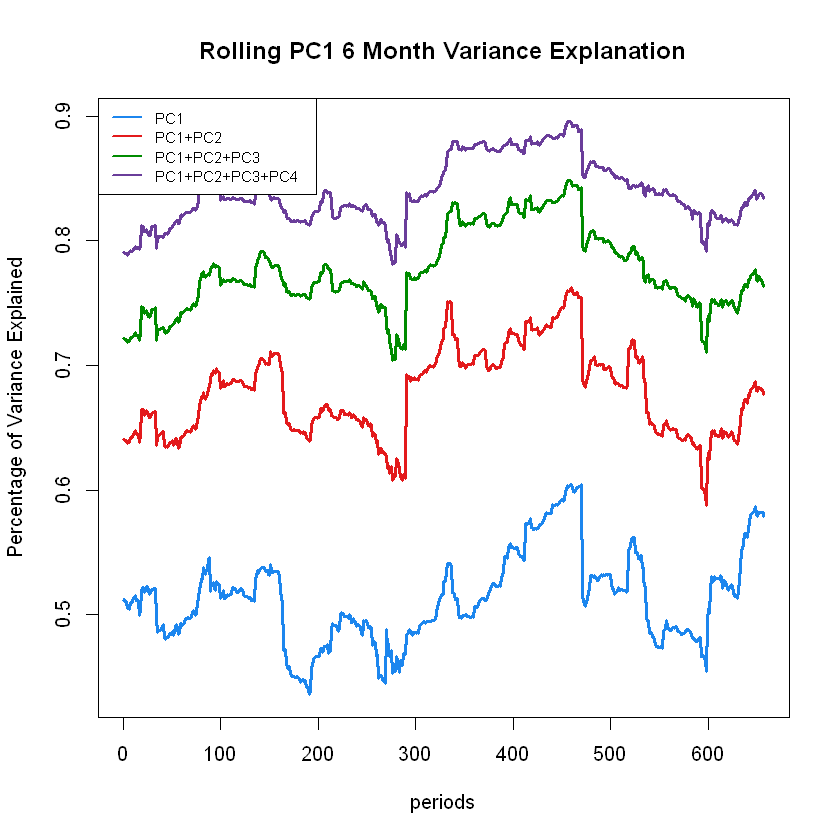

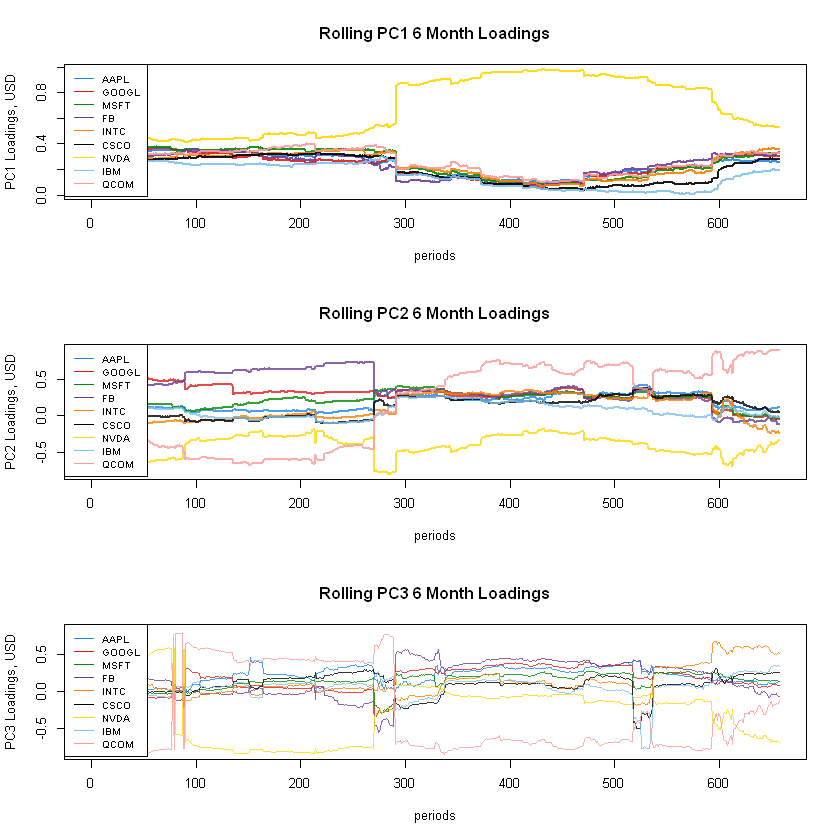

In [225]:
#Rolling PCA
u1_vecs = u2_vecs = u3_vecs = u4_vecs =proportion_mat = matrix(nrow = 9, ncol = (T-180))

for (period in c(1:(T-180))){
#      print(period)
    x_minimat = x_mat[,period:(period+180)]
    PCA_mini = myPCA(x_minimat)
    u1_vecs[,period] = PCA_mini$u_vecs[,1]
    u2_vecs[,period] = PCA_mini$u_vecs[,2]
    u3_vecs[,period] = PCA_mini$u_vecs[,3]
    u4_vecs[,period] = PCA_mini$u_vecs[,4]
    proportion_mat[,period] = PCA_mini$proportions
}

matplot(t(apply(proportion_mat[1:4,], 2, cumsum)), lty=1, type='l' , 
        ol=adjustcolor(colorvec, alpha.f = 1),
        lwd=2.5, xlab = "periods", ylab = "Percentage of Variance Explained", 
        main="Rolling PC1 6 Month Variance Explanation") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=c("PC1", "PC1+PC2", "PC1+PC2+PC3", "PC1+PC2+PC3+PC4"), 
       cex = 0.75, lty=1, lwd=2, col = colorvec)

par(mfrow = c(3,1))
matplot(t(u1_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.9),
        lwd=2, xlab = "periods", ylab = "PC1 Loadings, USD", 
        main="Rolling PC1 6 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(u2_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=2, xlab = "periods", ylab = "PC2 Loadings, USD", 
        main="Rolling PC2 6 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)

matplot(t(u3_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=1, xlab = "periods", ylab = "PC3 Loadings, USD", 
        main="Rolling PC3 6 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=tickers, cex = 0.75, lty=1, col = colorvec)


In [137]:
#TODO: correlation matrix vs cov
#TODO: log returns vs returns - maybe no
#TODO: alternative data - e.g. currency or country bonds

In [346]:
indexData <- new.env()
startDate = as.Date("2015-01-05")
endDate = as.Date("2018-02-01")
index_tickers <- c( "^BFX", "^FCHI", "^GDAXI","GREK","FTSEMIB.MI", 
                   "^AEX", "^IBEX", "^FTSE","^SSMI" )

index_names = c("Belgium", "France", "Germany", "Greece", "Italy", 
                "Netherlands", "Spain", "UK", "Switzerland")
getSymbols(index_tickers, env = indexData, src = "yahoo", 
           from = startDate, to = endDate)


Warning message:
"^BFX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"^GDAXI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"FTSEMIB.MI contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."pausing 1 second between requests for more than 5 symbols
pausing 1 second between requests for more than 5 symbols
Warning message:
"^IBEX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or repla

[1] "BFX"        "FCHI"       "GDAXI"      "GREK"       "FTSEMIB.MI"
[6] "AEX"        "IBEX"       "FTSE"       "SSMI"

In [378]:
a=cbind(Cl(indexData$BFX), Cl(indexData$FCHI), Cl(indexData$GDAXI),
       Cl(indexData$GREK), Cl(indexData$FTSEMIB.MI), Cl(indexData$AEX),
       Cl(indexData$IBEX), Cl(indexData$FTSE), Cl(indexData$SSMI))

index_data = t(matrix(na.fill(a, "extend"), ncol = 9))

In [350]:
index_list = list(na.fill(Cl(indexData$BFX), "extend"), 
                  na.fill(Cl(indexData$FCHI), "extend"), 
                  na.fill(Cl(indexData$GDAXI), "extend"),
                na.fill(Cl(indexData$GREK), "extend"),
                na.fill(Cl(indexData$FTSEMIB.MI),"extend"),
                na.fill(Cl(indexData$AEX),"extend"),
                na.fill(Cl(indexData$IBEX), "extend"),
                na.fill(Cl(indexData$FTSE), "extend"),
                na.fill(Cl(indexData$SSMI), "extend"))

# index_mat = rbind
# index_mat
# index_mat_nona = na.fill(index_mat, fill = "extend")
# sum(is.na(index_mat))
(lengths(index_list))

[1] 789 789 786 775 787 789 790 780 778

In [392]:
# index_data

In [379]:
index_pca = myPCA(index_data)

u_vecs = index_pca$u_vecs
lambdas = index_pca$lambdas
v_vecs = index_pca$v_vecs
total_var = index_pca$total_var
T = index_pca$T
delta_x = index_pca$delta_x
x_cent = index_pca$x_cent
x_mat = index_pca$x_mat
proportions = index_pca$proportions
# u_vecs
# sign(u_vecs[1,])
# sweep(u_vecs, 2, sign(u_vecs[1,]), '*')


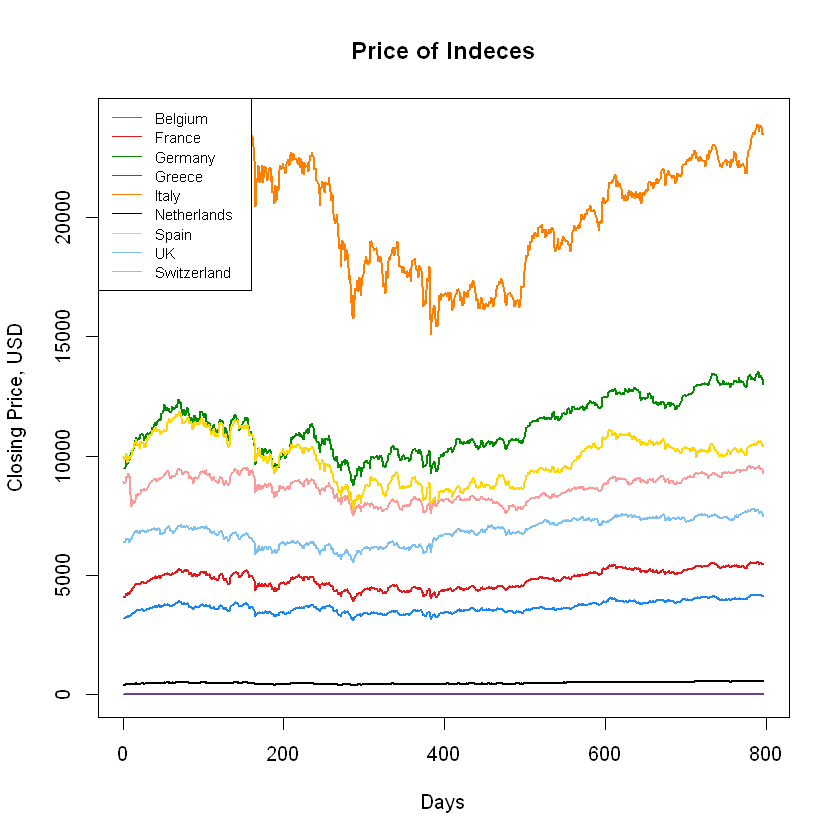

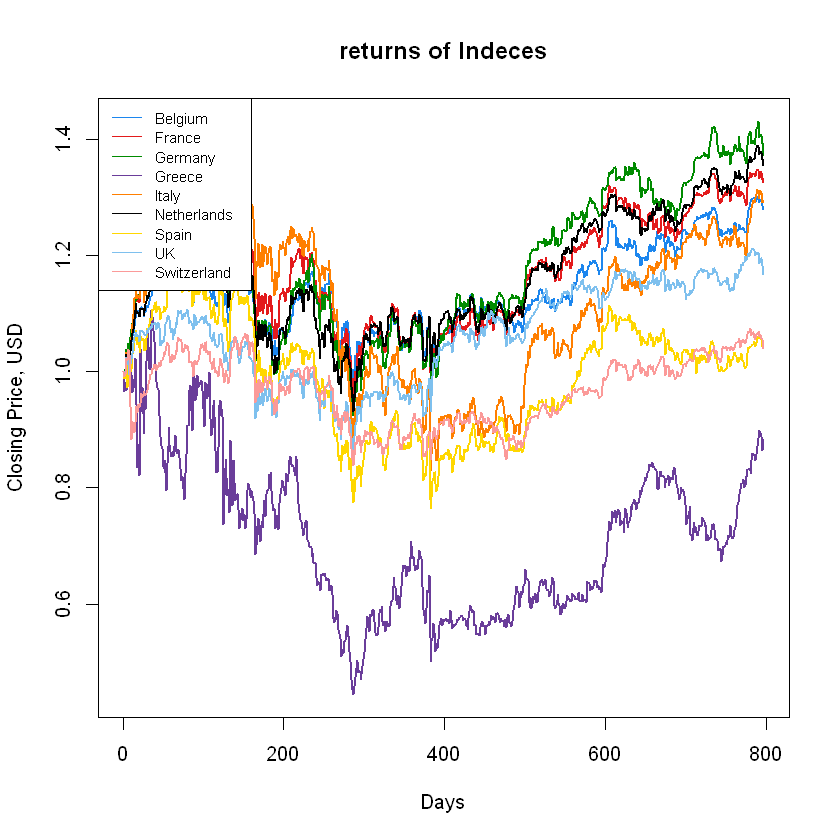

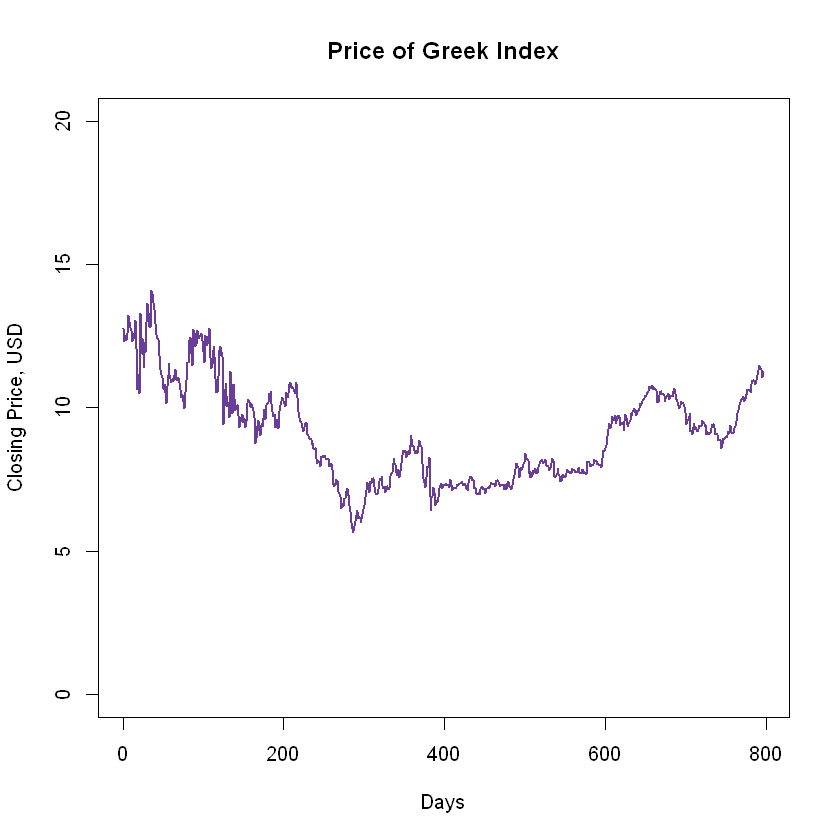

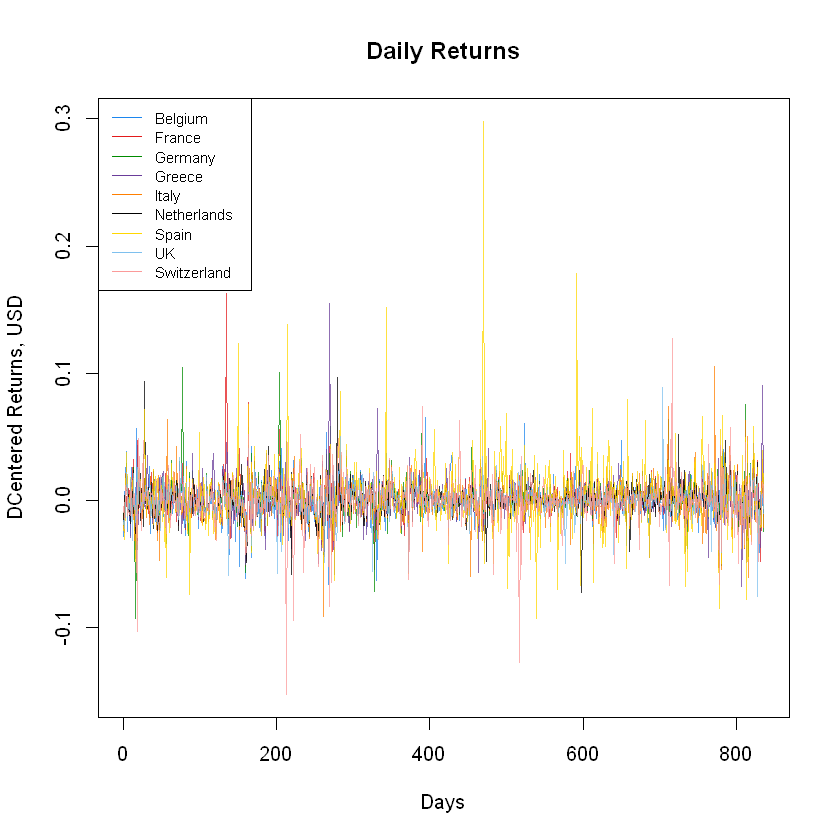

In [439]:

colorvec <- c("dodgerblue2","#E31A1C", # red
                "green4",
                "#6A3D9A", # purple
                "#FF7F00", # orange
                "black","gold1",
                "skyblue2","#FB9A99", # lt pink
                "palegreen2",
                "gray70", "khaki2",
                "maroon","orchid1","deeppink1","blue1","steelblue4",
                "darkturquoise","green1","yellow4","yellow3",
                "darkorange4")

matplot(t(index_data), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "Closing Price, USD", 
        main="Price of Indeces") #[,c(TRUE, rep(FALSE,2))]

legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(index_data/index_data[,1]), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "Closing Price, USD", 
        main="returns of Indeces") #[,c(TRUE, rep(FALSE,2))]

legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)


matplot(t(index_data), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "Closing Price, USD", 
        main="Price of Greek Index", ylim=c(0,20)) #[,c(TRUE, rep(FALSE,2))]

# legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)


matplot(t(delta_x), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.75),
        lwd=1, xlab = "Days", ylab = "DCentered Returns, USD", main="Daily Returns") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)


In [241]:
# colors(distinct = T)

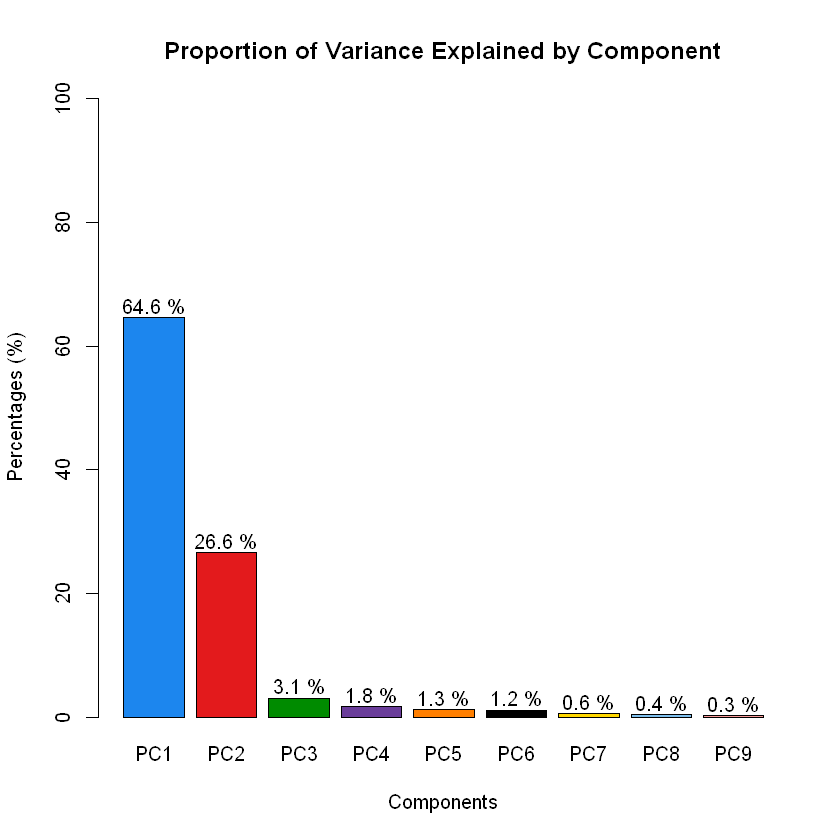

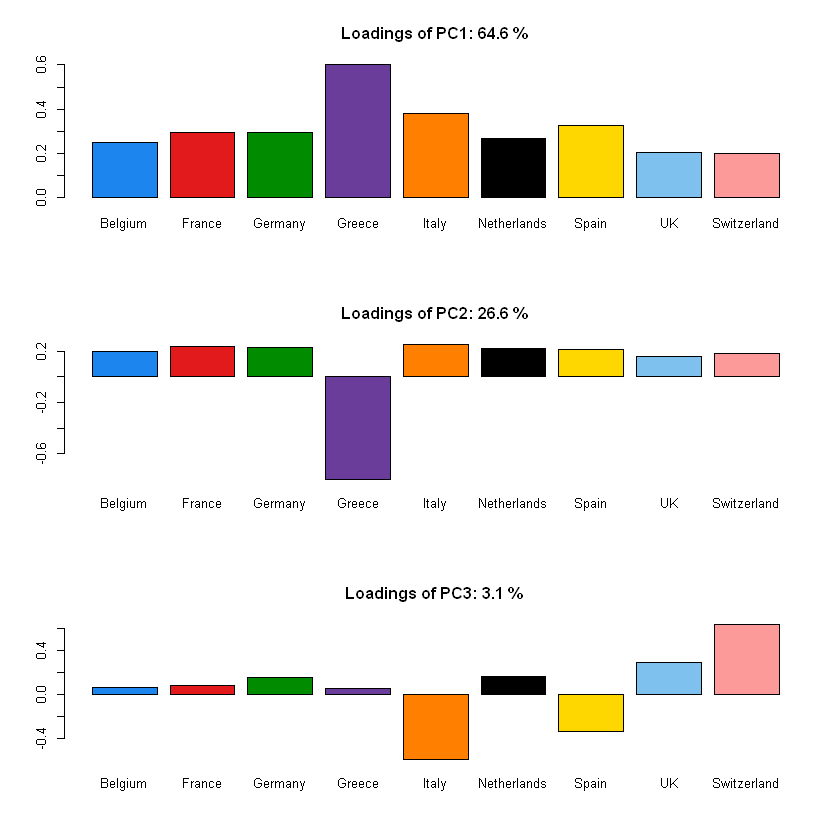

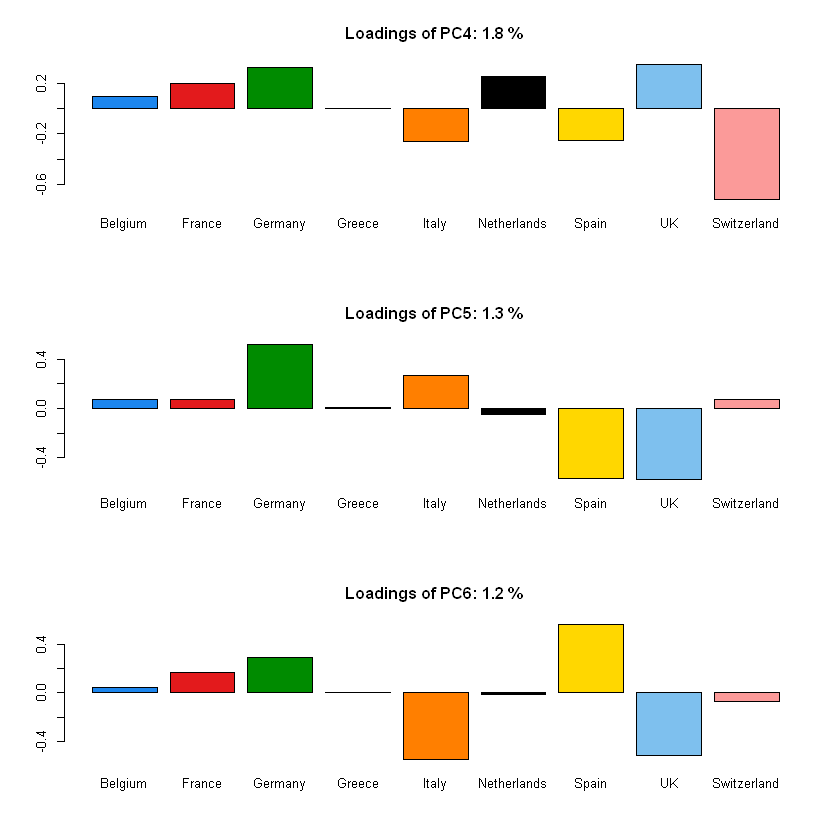

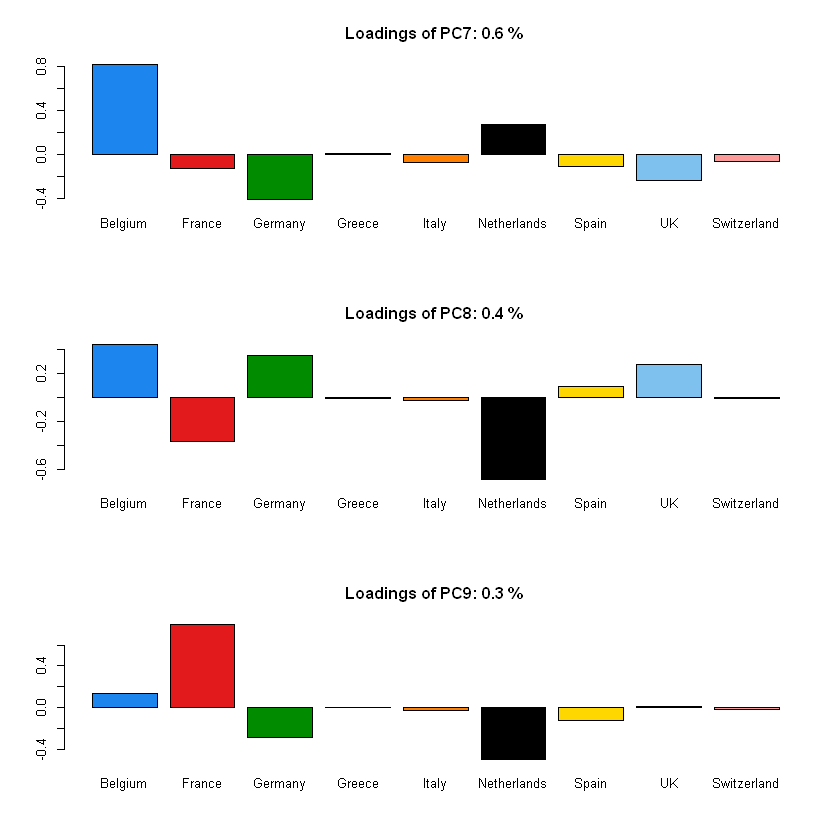

In [395]:

b<-barplot(proportions[1:9]*100, col = colorvec, 
        main = "Proportion of Variance Explained by Component",
       xlab="Components", ylab="Percentages (%)", 
        names = c("PC1", "PC2", "PC3","PC4", "PC5", "PC6", "PC7", "PC8","PC9"),
                 ylim=c(0,100))
text(x=b, y=proportions[1:9]*100+2, sprintf("%s %%",round(proportions[1:9]*100,1)))

components = 9
  par(mfrow = c(3,1))
for (component in c(1:components)){
    barplot(u_vecs[,component], col = colorvec, names = index_names, 
            main = sprintf("Loadings of PC%s: %s %%",component, 
                           round(proportions[component]*100,1)) )
}


In [397]:

PCtot = t(u_vecs) %*% x_cent #vs x_mat?
PCtot2 = t(u_vecs) %*% delta_x


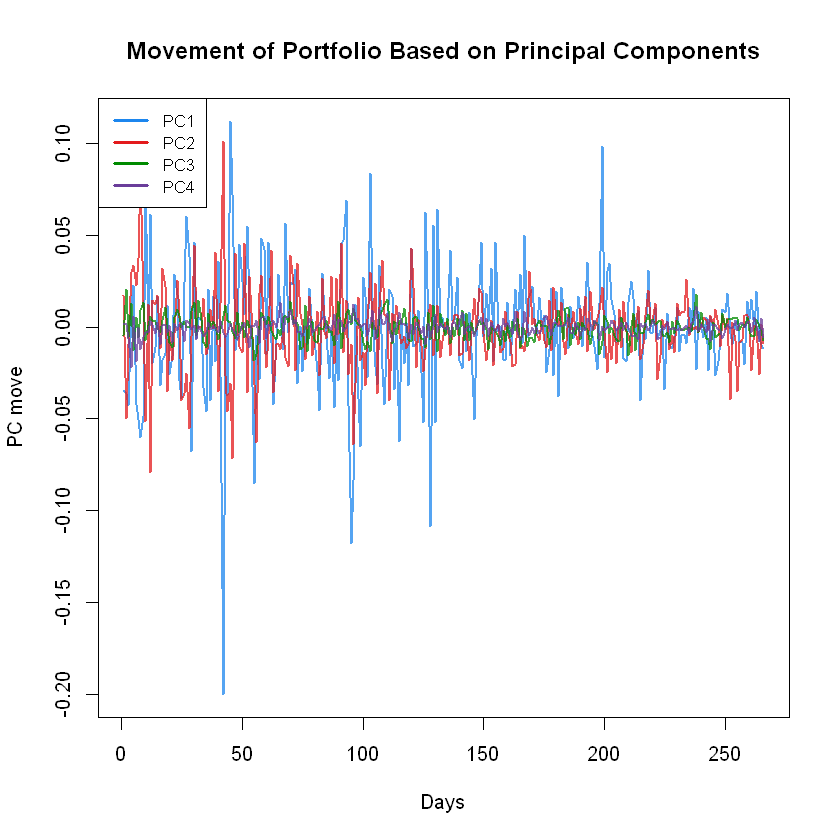

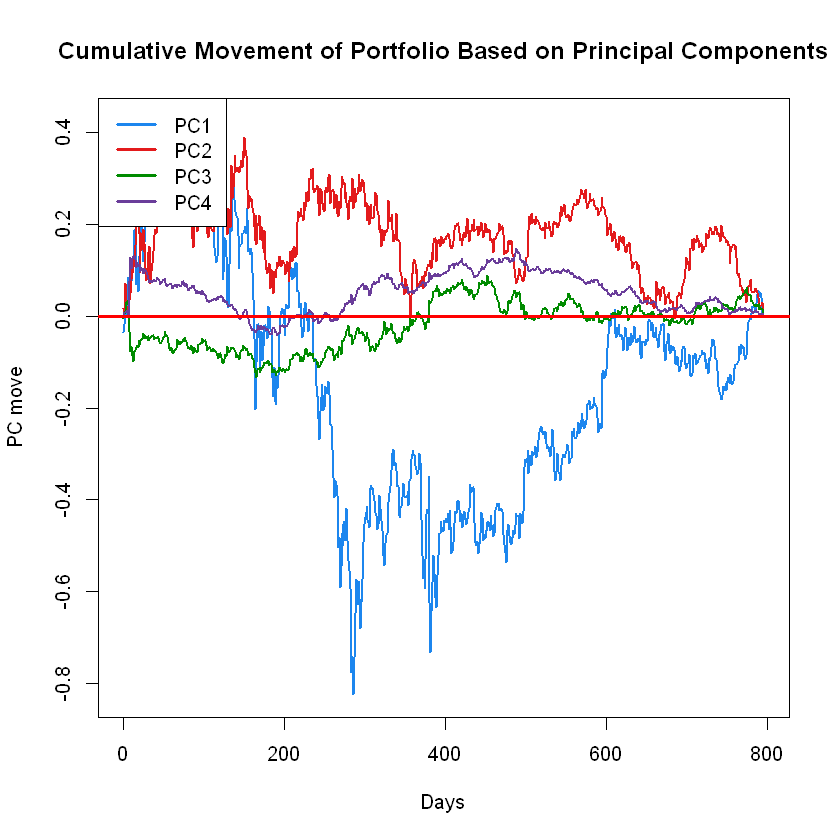

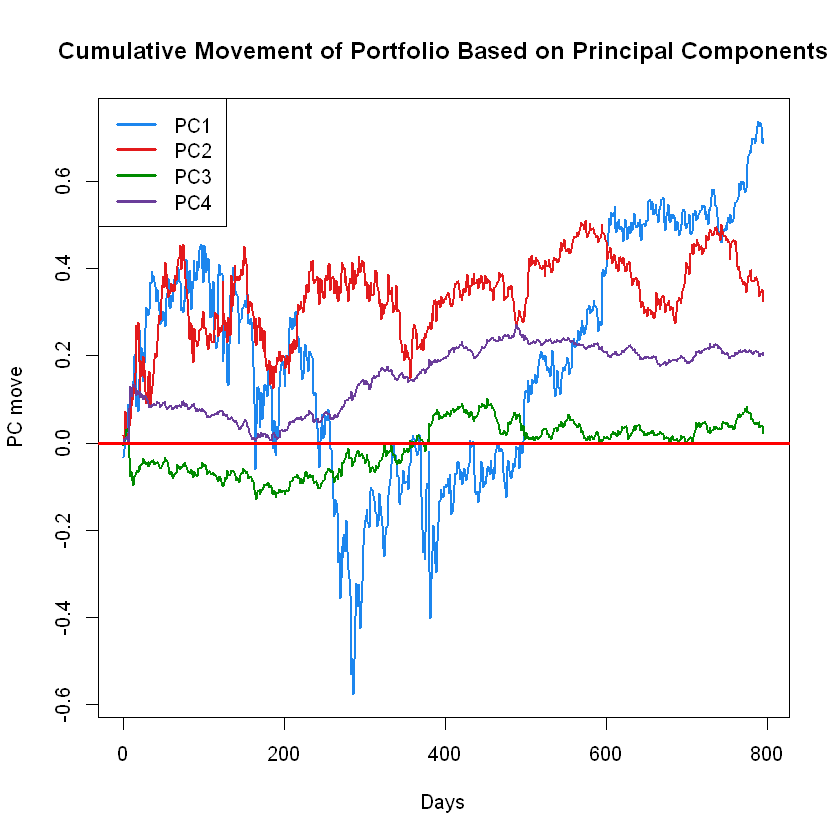

In [386]:
# par(mfrow = c(1,1))
# plot(c(1:(T-1)), PC1)
# lines(c(1:(T-1)), PC1)

# plot(c(1:(T-1)), PC2)
# lines(c(1:(T-1)), PC2)

matplot(t(PCtot[1:4,c(TRUE, rep(FALSE,2))]), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f=0.75),
        lwd=1.6, xlab = "Days", ylab = "PC move", 
        main="Movement of Portfolio Based on Principal Components") 
legend("topleft",legend=c("PC1","PC2","PC3","PC4"), cex = 0.85, lty=1,
       lwd = 3, col = colorvec)

cum_PCs = t(apply(PCtot,1,cumsum)[,1:4])
# cum_PCs_additive = apply(cum_PCs*proportions[1:4],2,cumsum)

matplot(t(cum_PCs), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "PC move", 
        main="Cumulative Movement of Portfolio Based on Principal Components") 
legend("topleft",legend=c("PC1","PC2","PC3","PC4"), cex = 1, lty=1,
       lwd = 3, col = colorvec)

abline(0,0, col="red", lwd=3)


cum_PCs_2 = t(apply(PCtot2,1,cumsum)[,1:4])

matplot(t(cum_PCs_2), lty=1, type='l' , col=colorvec,
        lwd=2, xlab = "Days", ylab = "PC move", 
        main="Cumulative Movement of Portfolio Based on Principal Components") 
legend("topleft",legend=c("PC1","PC2","PC3","PC4"), cex = 1, 
       lty=1,lwd = 3, col = colorvec)

abline(0,0, col="red", lwd=3)





# matplot(t(cum_PCs_additive), lty=1, type='l' , col=colorvec,
#         lwd=2, xlab = "Days", ylab = "PC move", main="Cumulative Movement of Portfolio Based on Principal Components") 
# legend("topleft",legend=c("PC1","PC2","PC3","PC4"), cex = 1, lty=1,lwd = 3, col = colorvec)



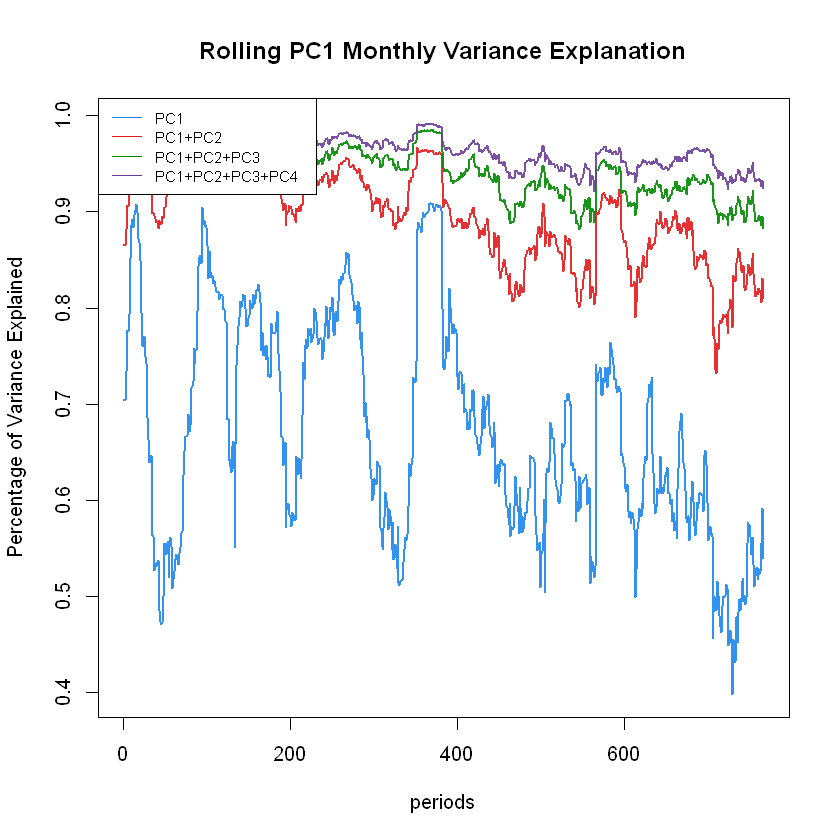

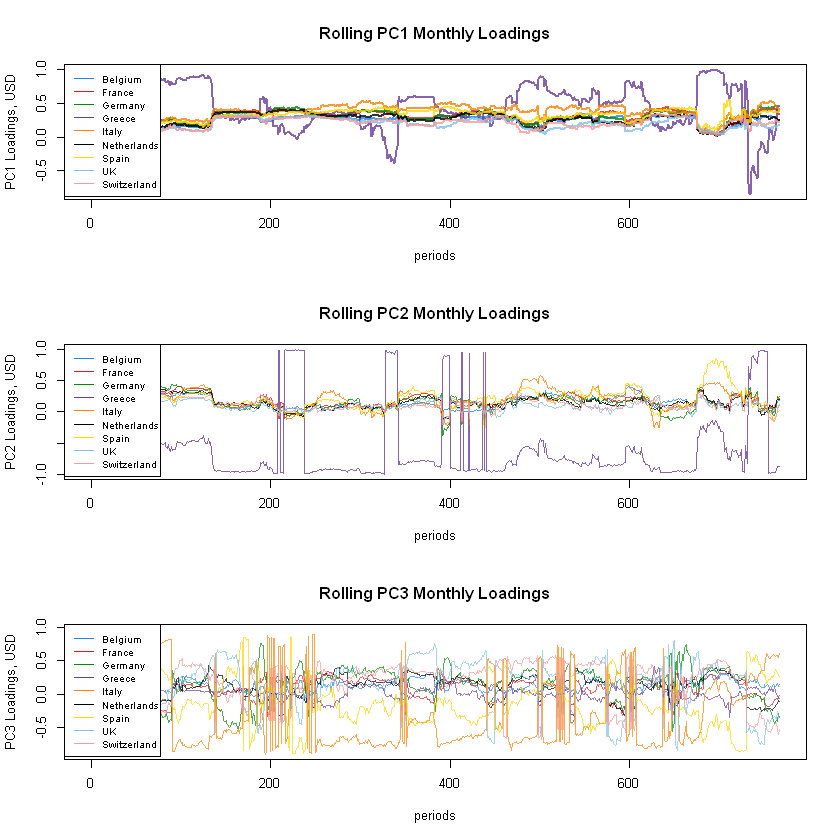

In [398]:
# Rolling PCA
u1_vecs = u2_vecs = u3_vecs = u4_vecs =proportion_mat = matrix(nrow = 9, ncol = (T-30))

for (period in c(1:(T-30))){
#      print(period)
    x_minimat = index_data[,period:(period+30)]
    PCA_mini = myPCA(x_minimat)
    u1_vecs[,period] = PCA_mini$u_vecs[,1]
    u2_vecs[,period] = PCA_mini$u_vecs[,2]
    u3_vecs[,period] = PCA_mini$u_vecs[,3]
    u4_vecs[,period] = PCA_mini$u_vecs[,4]
    proportion_mat[,period] = PCA_mini$proportions
}

matplot(t(apply(proportion_mat[1:4,], 2, cumsum)), lty=1, type='l' , 
        ol=adjustcolor(colorvec, alpha.f = 0.9),
        lwd=2, xlab = "periods", ylab = "Percentage of Variance Explained", 
        main="Rolling PC1 Monthly Variance Explanation") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=c("PC1", "PC1+PC2", "PC1+PC2+PC3", "PC1+PC2+PC3+PC4"), 
       cex = 0.75, lty=1, col = colorvec)

par(mfrow = c(3,1))
matplot(t(u1_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=2, xlab = "periods", ylab = "PC1 Loadings, USD", 
        main="Rolling PC1 Monthly Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(u2_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=1, xlab = "periods", ylab = "PC2 Loadings, USD", 
        main="Rolling PC2 Monthly Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(u3_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.7),
        lwd=1, xlab = "periods", ylab = "PC3 Loadings, USD", 
        main="Rolling PC3 Monthly Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)


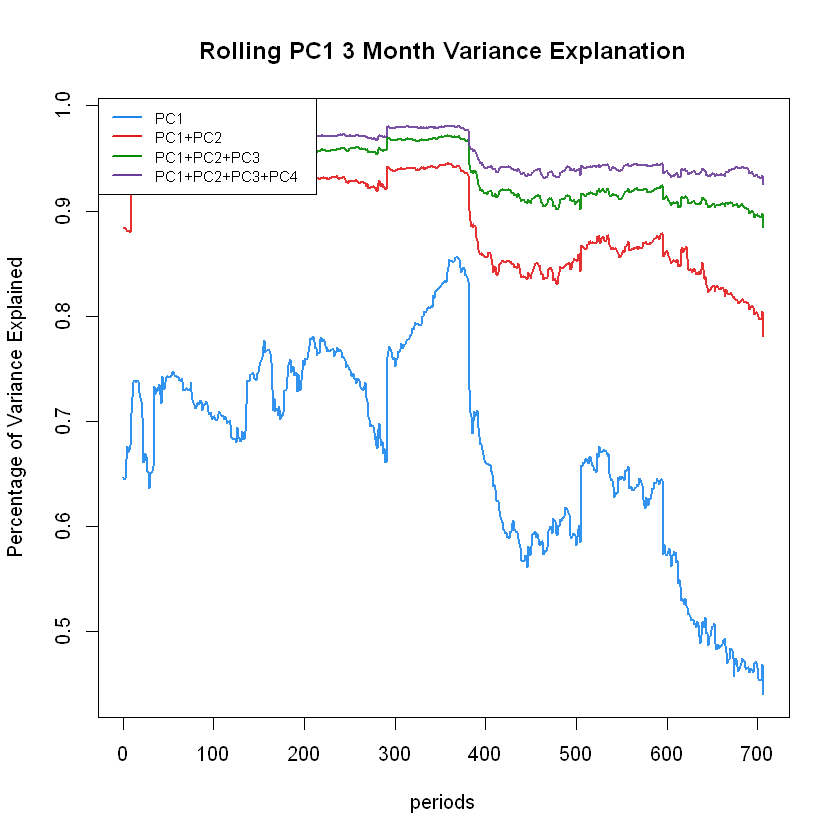

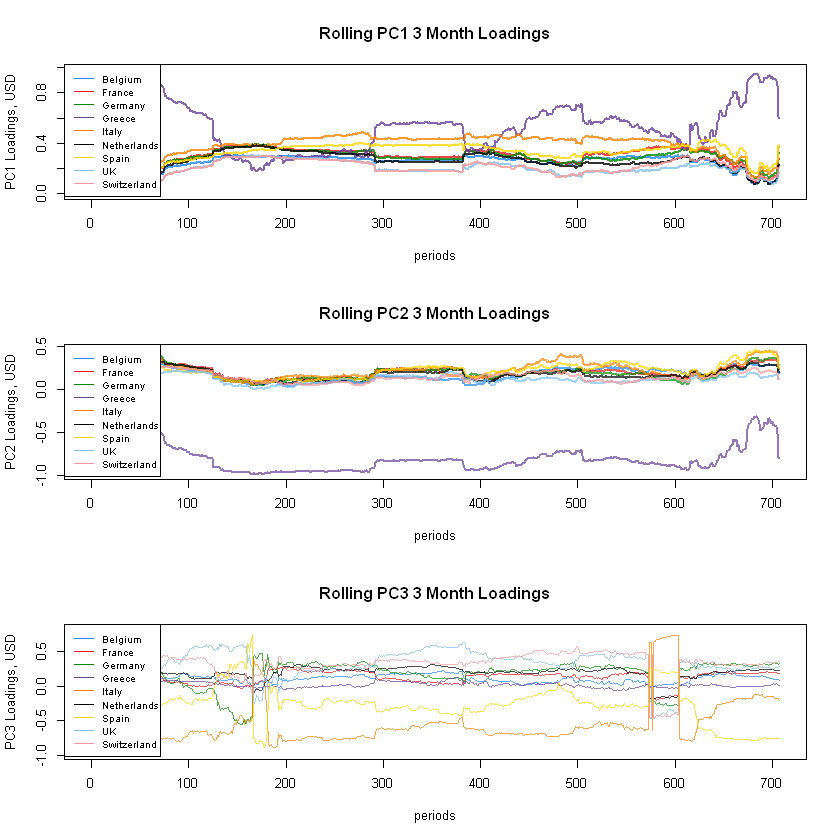

In [399]:

# Rolling PCA
u1_vecs = u2_vecs = u3_vecs = u4_vecs =proportion_mat = matrix(nrow = 9, ncol = (T-90))

for (period in c(1:(T-90))){
#      print(period)
    x_minimat = index_data[,period:(period+90)]
    PCA_mini = myPCA(x_minimat)
    u1_vecs[,period] = PCA_mini$u_vecs[,1]
    u2_vecs[,period] = PCA_mini$u_vecs[,2]
    u3_vecs[,period] = PCA_mini$u_vecs[,3]
    u4_vecs[,period] = PCA_mini$u_vecs[,4]
    proportion_mat[,period] = PCA_mini$proportions
}

matplot(t(apply(proportion_mat[1:4,], 2, cumsum)), lty=1, type='l' , 
        col=adjustcolor(colorvec, alpha.f = 0.9),
        lwd=2, xlab = "periods", ylab = "Percentage of Variance Explained", 
        main="Rolling PC1 3 Month Variance Explanation") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=c("PC1", "PC1+PC2", "PC1+PC2+PC3", "PC1+PC2+PC3+PC4"), 
       cex = 0.75, lty=1,lwd=2, col = colorvec)

par(mfrow = c(3,1))
matplot(t(u1_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=2, xlab = "periods", ylab = "PC1 Loadings, USD", 
        main="Rolling PC1 3 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(u2_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.7),
        lwd=2, xlab = "periods", ylab = "PC2 Loadings, USD", 
        main="Rolling PC2 3 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(u3_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.7),
        lwd=1, xlab = "periods", ylab = "PC3 Loadings, USD", 
        main="Rolling PC3 3 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)


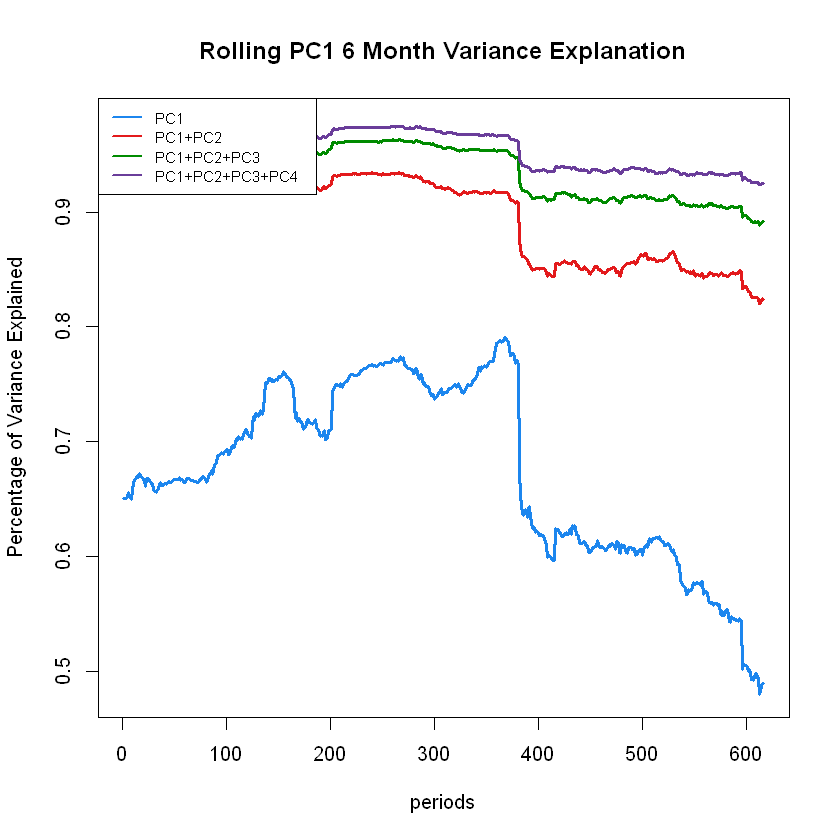

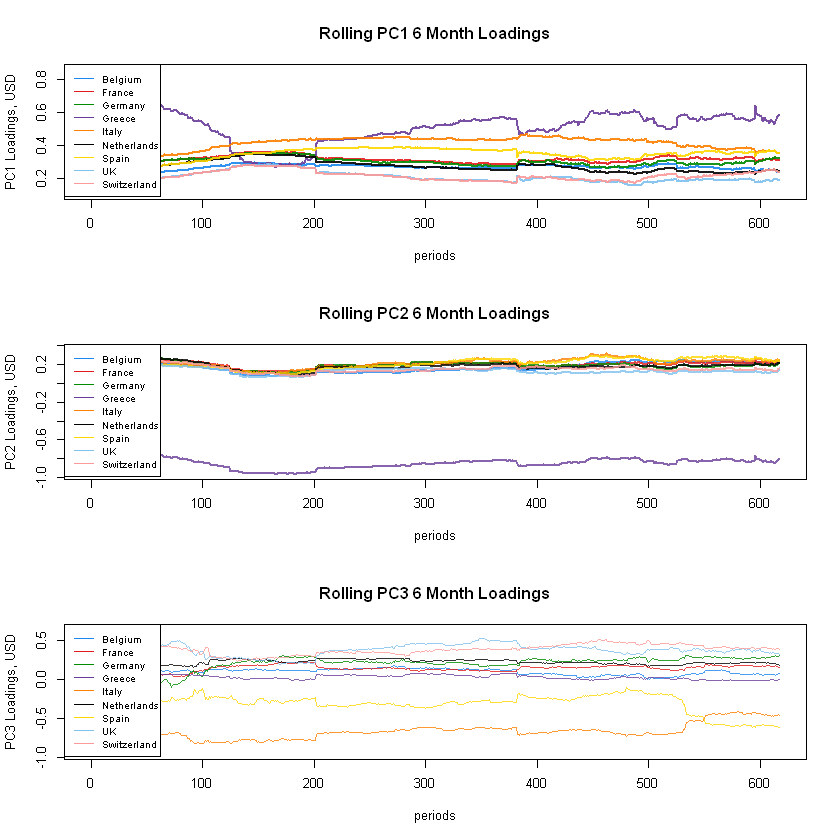

In [400]:
#Rolling PCA
u1_vecs = u2_vecs = u3_vecs = u4_vecs =proportion_mat = matrix(nrow = 9, ncol = (T-180))

for (period in c(1:(T-180))){
#      print(period)
    x_minimat = index_data[,period:(period+180)]
    PCA_mini = myPCA(x_minimat)
    u1_vecs[,period] = PCA_mini$u_vecs[,1]
    u2_vecs[,period] = PCA_mini$u_vecs[,2]
    u3_vecs[,period] = PCA_mini$u_vecs[,3]
    u4_vecs[,period] = PCA_mini$u_vecs[,4]
    proportion_mat[,period] = PCA_mini$proportions
}

matplot(t(apply(proportion_mat[1:4,], 2, cumsum)), lty=1, type='l' , 
        col=adjustcolor(colorvec, alpha.f = 1),
        lwd=2.5, xlab = "periods", ylab = "Percentage of Variance Explained", 
        main="Rolling PC1 6 Month Variance Explanation") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=c("PC1", "PC1+PC2", "PC1+PC2+PC3", "PC1+PC2+PC3+PC4"), 
       cex = 0.75, lty=1, lwd=2, col = colorvec)

par(mfrow = c(3,1))
matplot(t(u1_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.9),
        lwd=2, xlab = "periods", ylab = "PC1 Loadings, USD", 
        main="Rolling PC1 6 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(u2_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=2, xlab = "periods", ylab = "PC2 Loadings, USD", 
        main="Rolling PC2 6 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)

matplot(t(u3_vecs), lty=1, type='l' , col=adjustcolor(colorvec, alpha.f = 0.8),
        lwd=1, xlab = "periods", ylab = "PC3 Loadings, USD", 
        main="Rolling PC3 6 Month Loadings") #[,c(TRUE, rep(FALSE,2))]
legend("topleft",legend=index_names, cex = 0.75, lty=1, col = colorvec)
